### Configuration et imports
CRYPTO ANALYSIS - EXPLORATION DES DONNÉES
Notebook d'exploration initiale des données de crypto-monnaies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuration d'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8')

# Import des configurations
import sys
sys.path.append('..')
from config.config import *
from src.data_collection import CryptoDataCollector

print("✅ Modules importés avec succès")
print(f"📊 Crypto-monnaies à analyser: {list(CRYPTOCURRENCIES.values())}")

✅ Modules importés avec succès
📊 Crypto-monnaies à analyser: ['BTC', 'ETH', 'ADA', 'DOT', 'SOL', 'LINK']


### Collecte des données
COLLECTE DES DONNÉES
Récupération des données historiques via l'API CoinGecko

In [2]:
collector = CryptoDataCollector()

print("🚀 Début de la collecte de données...")
print(f"📅 Période: {DEFAULT_DAYS} derniers jours")

# Récupérer les données
crypto_data = collector.get_multiple_cryptos(CRYPTOCURRENCIES, days=DEFAULT_DAYS)

# Vérifier les données collectées
print(f"\n📊 Données collectées pour {len(crypto_data)} crypto-monnaies:")
for symbol, df in crypto_data.items():
    print(f"  {symbol}: {len(df)} jours de données")

🚀 Début de la collecte de données...
📅 Période: 365 derniers jours
📊 Récupération des données pour BTC (bitcoin)...
✅ Données récupérées pour bitcoin: 366 jours
📊 Récupération des données pour ETH (ethereum)...
✅ Données récupérées pour ethereum: 366 jours
📊 Récupération des données pour ADA (cardano)...
✅ Données récupérées pour cardano: 366 jours
📊 Récupération des données pour DOT (polkadot)...
✅ Données récupérées pour polkadot: 366 jours
📊 Récupération des données pour SOL (solana)...
✅ Données récupérées pour solana: 366 jours
📊 Récupération des données pour LINK (chainlink)...
❌ Erreur lors de la récupération de chainlink: 429 Client Error: Too Many Requests for url: https://api.coingecko.com/api/v3/coins/chainlink/market_chart?vs_currency=usd&days=365&interval=daily

📊 Données collectées pour 5 crypto-monnaies:
  BTC: 366 jours de données
  ETH: 366 jours de données
  ADA: 366 jours de données
  DOT: 366 jours de données
  SOL: 366 jours de données


### APERÇU DES DONNÉES
Première inspection des datasets


In [3]:
# Afficher les premières lignes pour chaque crypto
for symbol, df in crypto_data.items():
    print(f"\n{'='*50}")
    print(f"📈 {symbol} - Aperçu des données")
    print(f"{'='*50}")
    print(f"Shape: {df.shape}")
    print(f"Colonnes: {list(df.columns)}")
    print(f"Période: {df.index[0].strftime('%Y-%m-%d')} à {df.index[-1].strftime('%Y-%m-%d')}")
    print(f"\nPremières lignes:")
    print(df.head())
    print(f"\nDernières lignes:")
    print(df.tail())
    print(f"\nInfo sur les données:")
    print(df.info())


📈 BTC - Aperçu des données
Shape: (366, 6)
Colonnes: ['price', 'market_cap', 'volume', 'returns', 'log_returns', 'symbol']
Période: 2024-10-01 à 2025-09-30

Premières lignes:
                   price    market_cap        volume   returns  log_returns  \
date                                                                          
2024-10-01  63243.275325  1.249578e+12  3.512445e+10       NaN          NaN   
2024-10-02  60872.668544  1.202927e+12  5.425149e+10 -0.037484    -0.038205   
2024-10-03  60655.559792  1.198652e+12  4.187073e+10 -0.003567    -0.003573   
2024-10-04  60727.863952  1.200491e+12  3.771114e+10  0.001192     0.001191   
2024-10-05  62103.010473  1.226663e+12  3.034906e+10  0.022644     0.022392   

           symbol  
date               
2024-10-01    BTC  
2024-10-02    BTC  
2024-10-03    BTC  
2024-10-04    BTC  
2024-10-05    BTC  

Dernières lignes:
                             price    market_cap        volume   returns  \
date                               

### STATISTIQUES DESCRIPTIVES
Calcul des statistiques de base pour toutes les crypto-monnaies

In [4]:
def calculate_crypto_stats(data_dict):
    """Calcule les statistiques pour toutes les cryptos"""
    stats_list = []
    
    for symbol, df in data_dict.items():
        # Calculs de base
        current_price = df['price'].iloc[-1]
        start_price = df['price'].iloc[0]
        total_return = ((current_price / start_price) - 1) * 100
        
        # Volatilité et Sharpe ratio
        returns = df['returns'].dropna()
        volatility = returns.std() * np.sqrt(365) * 100  # Annualisée
        sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(365) if returns.std() != 0 else 0
        
        # Max drawdown
        rolling_max = df['price'].expanding().max()
        drawdown = (df['price'] - rolling_max) / rolling_max
        max_drawdown = drawdown.min() * 100
        
        stats = {
            'Symbol': symbol,
            'Prix_Actuel_$': round(current_price, 2),
            'Prix_Min_$': round(df['price'].min(), 2),
            'Prix_Max_$': round(df['price'].max(), 2),
            'Rendement_Total_%': round(total_return, 2),
            'Rendement_Moyen_Daily_%': round(returns.mean() * 100, 4),
            'Volatilité_Annuelle_%': round(volatility, 2),
            'Sharpe_Ratio': round(sharpe_ratio, 3),
            'Max_Drawdown_%': round(max_drawdown, 2),
            'Volume_Moyen_$': round(df['volume'].mean(), 0),
            'Jours_Données': len(df)
        }
        stats_list.append(stats)
    
    return pd.DataFrame(stats_list)

# Calculer et afficher les statistiques
stats_df = calculate_crypto_stats(crypto_data)
print("📊 STATISTIQUES GÉNÉRALES")
print("="*60)
print(stats_df.to_string(index=False))

# Identifier les extrêmes
print(f"\n🏆 CHAMPIONS:")
print(f"🚀 Meilleure performance: {stats_df.loc[stats_df['Rendement_Total_%'].idxmax(), 'Symbol']} ({stats_df['Rendement_Total_%'].max():.1f}%)")
print(f"⚡ Plus volatile: {stats_df.loc[stats_df['Volatilité_Annuelle_%'].idxmax(), 'Symbol']} ({stats_df['Volatilité_Annuelle_%'].max():.1f}%)")
print(f"📈 Meilleur Sharpe: {stats_df.loc[stats_df['Sharpe_Ratio'].idxmax(), 'Symbol']} ({stats_df['Sharpe_Ratio'].max():.2f})")


📊 STATISTIQUES GÉNÉRALES
Symbol  Prix_Actuel_$  Prix_Min_$  Prix_Max_$  Rendement_Total_%  Rendement_Moyen_Daily_%  Volatilité_Annuelle_%  Sharpe_Ratio  Max_Drawdown_%  Volume_Moyen_$  Jours_Données
   BTC      113405.42    60195.18   123560.99              79.32                   0.1863                  43.96         1.547          -28.12    4.492429e+10            366
   ETH        4108.67     1471.36     4829.23              58.19                   0.2014                  74.96         0.981          -63.36    2.681501e+10            366
   ADA           0.79        0.32        1.23             111.20                   0.3725                 118.14         1.151          -56.11    1.350291e+09            366
   DOT           3.84        3.16       10.73             -13.43                   0.0631                  87.03         0.264          -70.60    3.715250e+08            366
   SOL         206.63      105.49      262.56              35.46                   0.1818                

### ÉVOLUTION DES PRIX
Comparaison de l'évolution des prix (base 100)

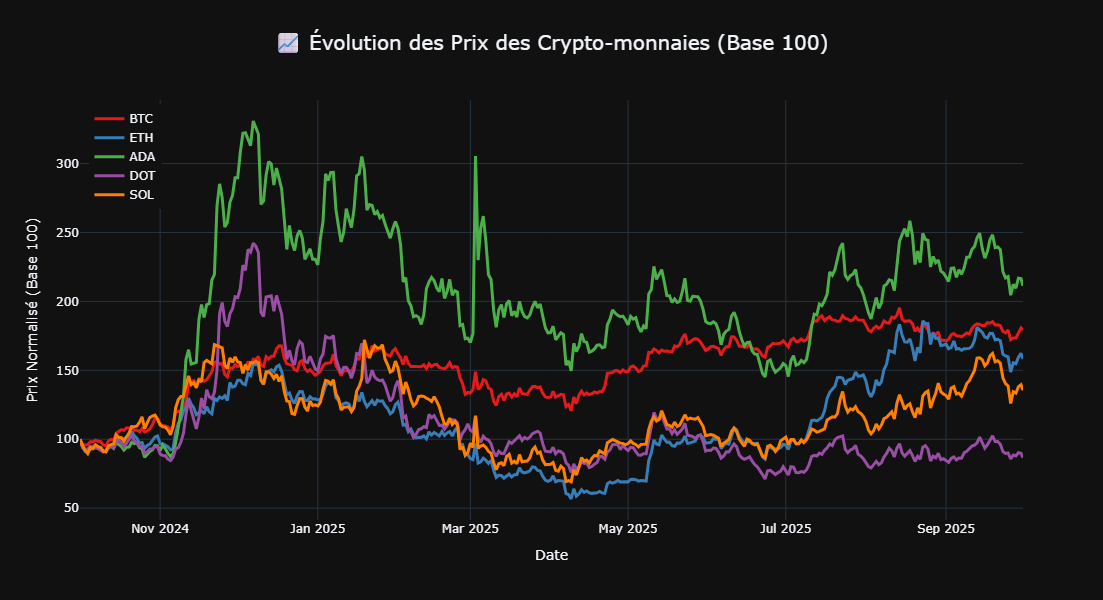

In [5]:
# Créer le graphique d'évolution des prix normalisés
fig = go.Figure()

colors = px.colors.qualitative.Set1

for i, (symbol, df) in enumerate(crypto_data.items()):
    # Normaliser les prix (base 100 au début)
    normalized_prices = (df['price'] / df['price'].iloc[0]) * 100
    
    fig.add_trace(go.Scatter(
        x=df.index,
        y=normalized_prices,
        mode='lines',
        name=symbol,
        line=dict(width=3, color=colors[i % len(colors)]),
        hovertemplate=f'<b>{symbol}</b><br>' +
                     'Date: %{x}<br>' +
                     'Prix normalisé: %{y:.1f}<br>' +
                     '<extra></extra>'
    ))

fig.update_layout(
    title={
        'text': "📈 Évolution des Prix des Crypto-monnaies (Base 100)",
        'x': 0.5,
        'font': {'size': 20}
    },
    xaxis_title="Date",
    yaxis_title="Prix Normalisé (Base 100)",
    template='plotly_dark',
    height=600,
    width=1200,
    showlegend=True,
    hovermode='x unified',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

fig.show()


### ANALYSE DES CORRÉLATIONS
Corrélations entre les rendements des différentes crypto-monnaies

🔗 MATRICE DE CORRÉLATION DES RENDEMENTS
       BTC    ETH    ADA    DOT    SOL
BTC  1.000  0.770  0.672  0.649  0.754
ETH  0.770  1.000  0.676  0.744  0.747
ADA  0.672  0.676  1.000  0.694  0.689
DOT  0.649  0.744  0.694  1.000  0.632
SOL  0.754  0.747  0.689  0.632  1.000


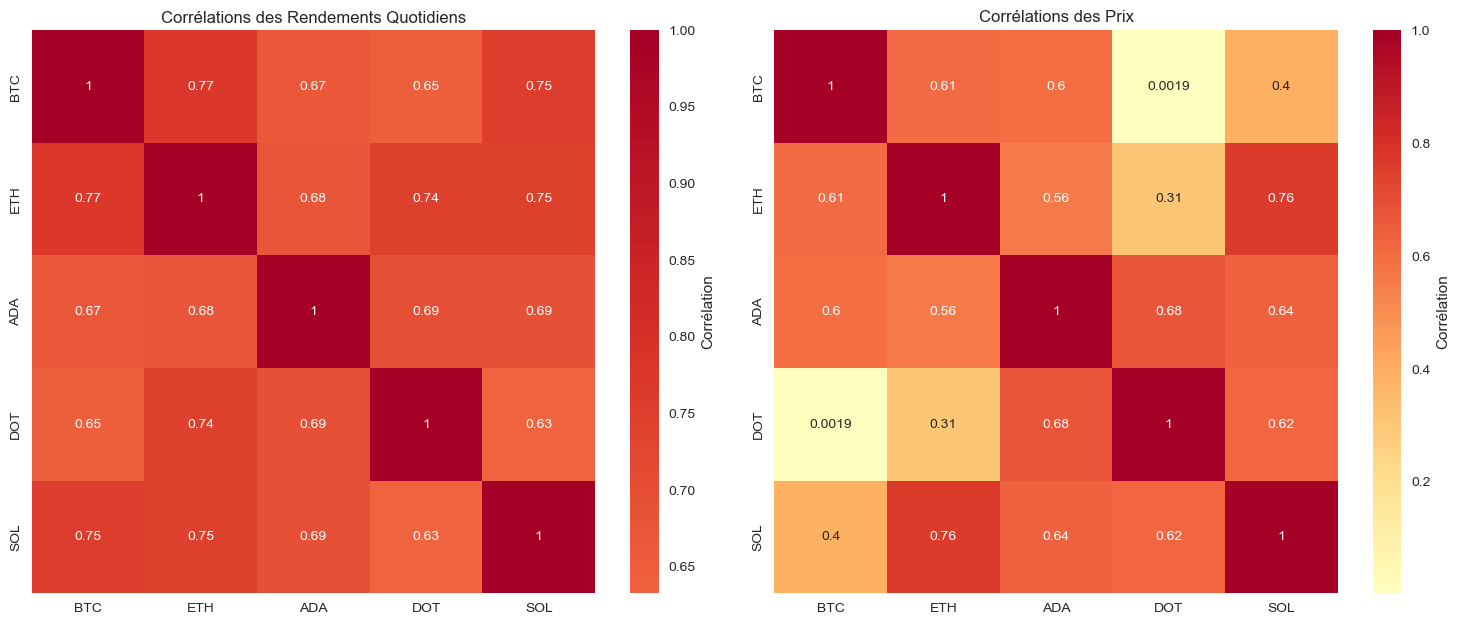

In [9]:
# Créer un DataFrame avec tous les rendements
returns_df = pd.DataFrame()
prices_df = pd.DataFrame()

for symbol, df in crypto_data.items():
    returns_df[symbol] = df['returns']
    prices_df[symbol] = df['price']

# Calculer les corrélations
returns_corr = returns_df.corr()
prices_corr = prices_df.corr()

print("🔗 MATRICE DE CORRÉLATION DES RENDEMENTS")
print("="*50)
print(returns_corr.round(3))

# Heatmap des corrélations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Corrélations des rendements
sns.heatmap(returns_corr, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, ax=ax1, cbar_kws={'label': 'Corrélation'})
ax1.set_title('Corrélations des Rendements Quotidiens')

# Corrélations des prix
sns.heatmap(prices_corr, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, ax=ax2, cbar_kws={'label': 'Corrélation'})
ax2.set_title('Corrélations des Prix')

plt.tight_layout()
plt.show()

### DISTRIBUTION DES RENDEMENTS
Analyse de la distribution des rendements quotidiens

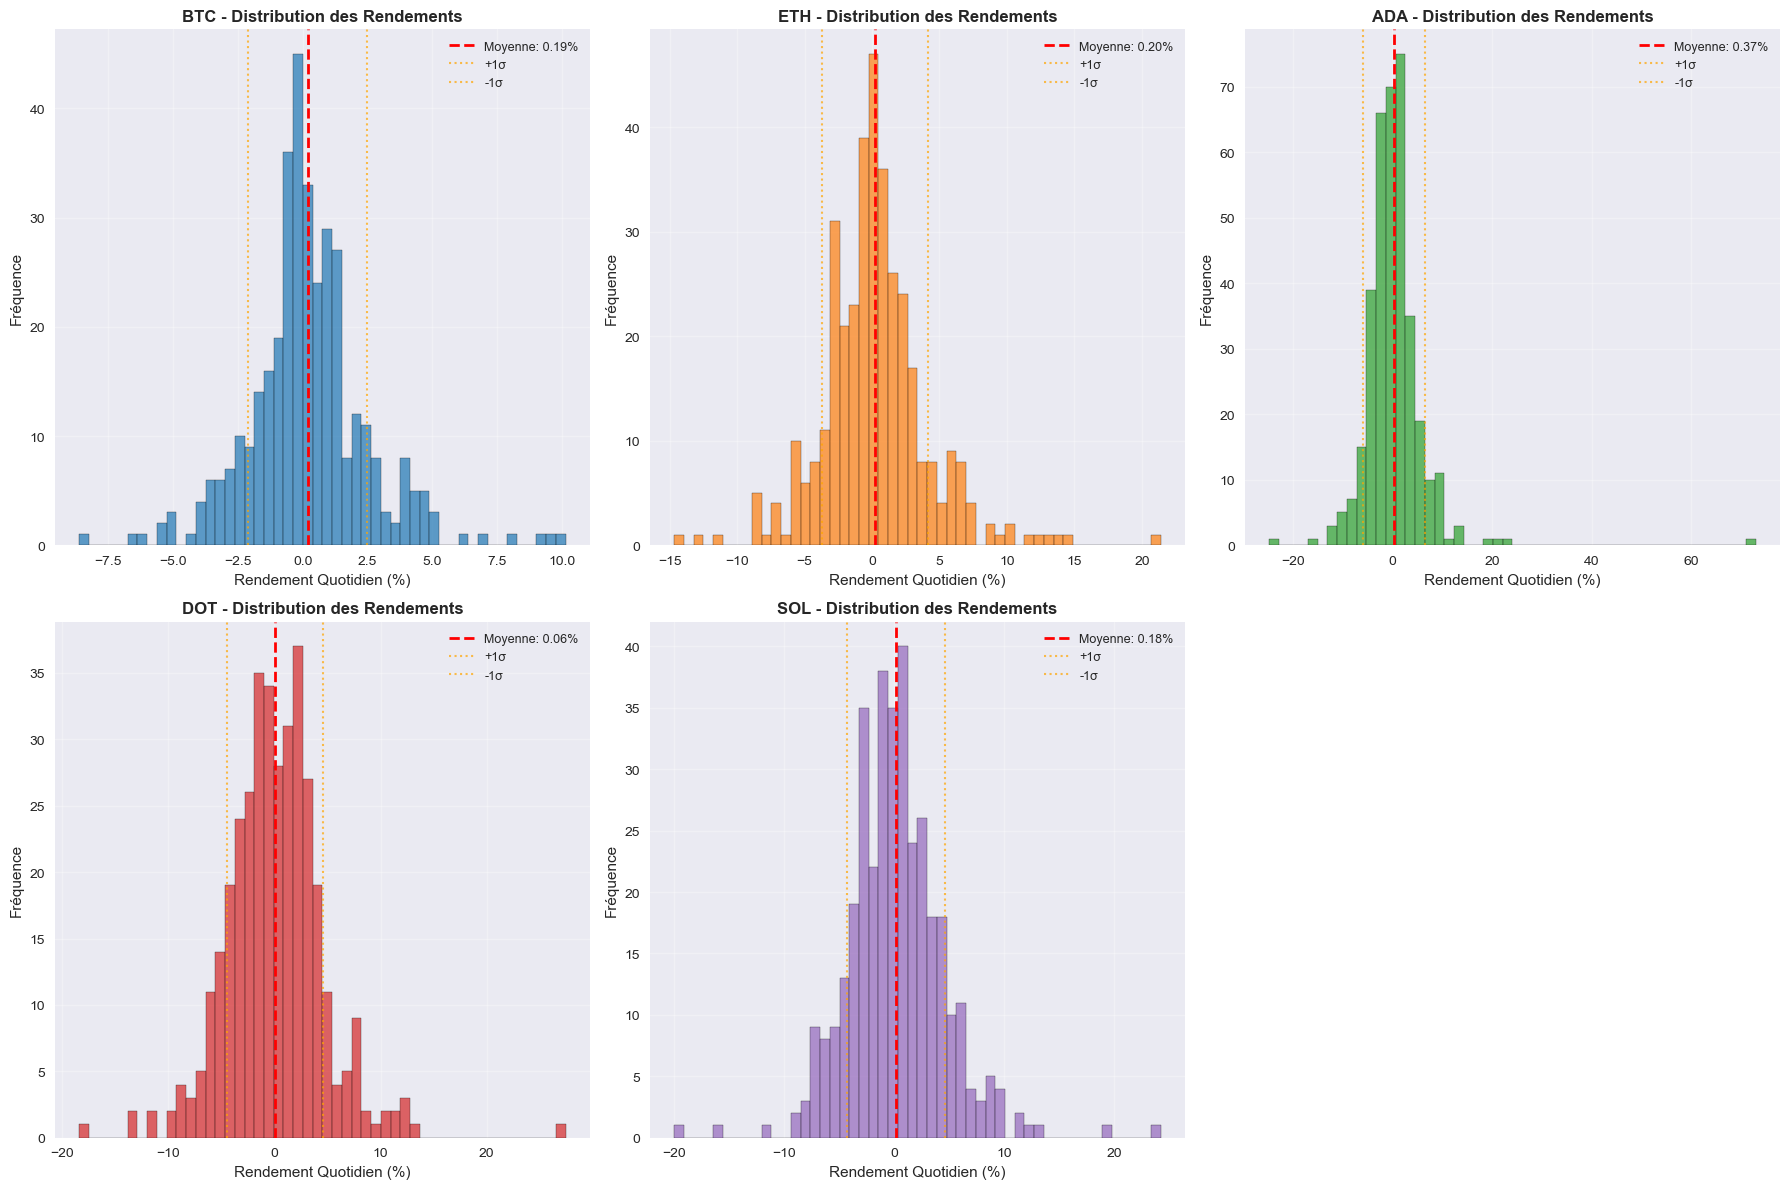

In [11]:
# Cellule 7 - Distribution des rendements
"""
📊 DISTRIBUTION DES RENDEMENTS
Analyse de la distribution des rendements quotidiens
"""

# Utiliser des couleurs compatibles avec Matplotlib
colors_mpl = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Créer des subplots pour chaque crypto
n_cryptos = len(crypto_data)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (symbol, df) in enumerate(crypto_data.items()):
    returns = df['returns'].dropna() * 100  # En pourcentage
    
    # Histogramme
    axes[i].hist(returns, bins=50, alpha=0.7, color=colors_mpl[i % len(colors_mpl)], 
                 edgecolor='black')
    axes[i].set_title(f'{symbol} - Distribution des Rendements', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Rendement Quotidien (%)')
    axes[i].set_ylabel('Fréquence')
    axes[i].grid(True, alpha=0.3)
    
    # Ajouter des statistiques sur le graphique
    mean_return = returns.mean()
    std_return = returns.std()
    axes[i].axvline(mean_return, color='red', linestyle='--', linewidth=2,
                    label=f'Moyenne: {mean_return:.2f}%')
    axes[i].axvline(mean_return + std_return, color='orange', linestyle=':', 
                    linewidth=1.5, alpha=0.7, label='+1σ')
    axes[i].axvline(mean_return - std_return, color='orange', linestyle=':', 
                    linewidth=1.5, alpha=0.7, label='-1σ')
    axes[i].legend(fontsize=9)

# Masquer les subplots supplémentaires s'il y en a
if n_cryptos < len(axes):
    for j in range(n_cryptos, len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()
plt.show()

###  ANALYSE DES VOLUMES
Relation entre volume de trading et mouvements de prix

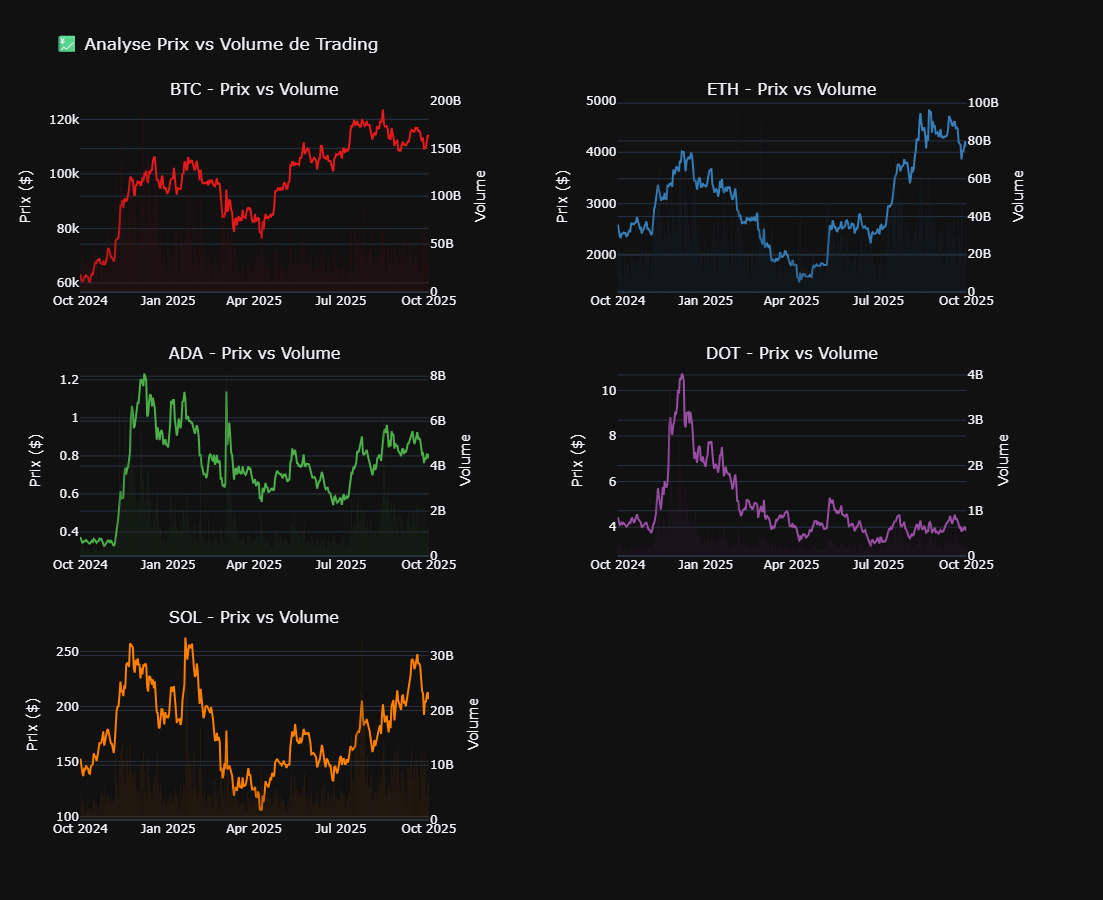

In [12]:
# Graphique volume vs prix pour chaque crypto
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=[f"{symbol} - Prix vs Volume" for symbol in crypto_data.keys()],
    specs=[[{"secondary_y": True}, {"secondary_y": True}],
           [{"secondary_y": True}, {"secondary_y": True}],
           [{"secondary_y": True}, {"secondary_y": True}]],
    vertical_spacing=0.1
)

row_col_positions = [(1,1), (1,2), (2,1), (2,2), (3,1), (3,2)]

for i, (symbol, df) in enumerate(crypto_data.items()):
    row, col = row_col_positions[i]
    
    # Prix
    fig.add_trace(
        go.Scatter(x=df.index, y=df['price'], name=f"{symbol} Prix",
                  line=dict(color=colors[i % len(colors)], width=2)),
        row=row, col=col, secondary_y=False
    )
    
    # Volume
    fig.add_trace(
        go.Bar(x=df.index, y=df['volume'], name=f"{symbol} Volume",
               marker_color=colors[i % len(colors)], opacity=0.3),
        row=row, col=col, secondary_y=True
    )

# Mise à jour du layout
for i in range(1, 4):
    for j in range(1, 3):
        fig.update_yaxes(title_text="Prix ($)", secondary_y=False, row=i, col=j)
        fig.update_yaxes(title_text="Volume", secondary_y=True, row=i, col=j)

fig.update_layout(
    title="💹 Analyse Prix vs Volume de Trading",
    template='plotly_dark',
    height=900,
    showlegend=False
)

fig.show()


### RENDEMENTS CUMULÉS
Évolution de la performance cumulative

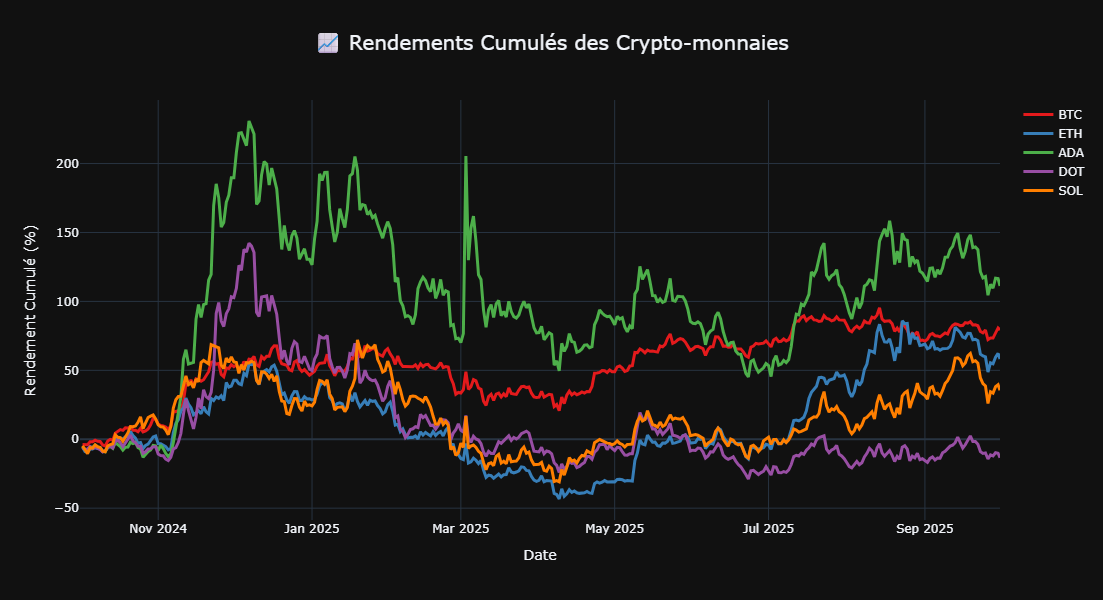

In [13]:
fig = go.Figure()

for i, (symbol, df) in enumerate(crypto_data.items()):
    # Calculer les rendements cumulés
    cumulative_returns = (1 + df['returns']).cumprod() - 1
    
    fig.add_trace(go.Scatter(
        x=df.index,
        y=cumulative_returns * 100,
        mode='lines',
        name=symbol,
        line=dict(width=3, color=colors[i % len(colors)]),
        hovertemplate=f'<b>{symbol}</b><br>' +
                     'Date: %{x}<br>' +
                     'Rendement cumulé: %{y:.1f}%<br>' +
                     '<extra></extra>'
    ))

fig.update_layout(
    title={
        'text': "📈 Rendements Cumulés des Crypto-monnaies",
        'x': 0.5,
        'font': {'size': 20}
    },
    xaxis_title="Date",
    yaxis_title="Rendement Cumulé (%)",
    template='plotly_dark',
    height=600,
    width=1200,
    showlegend=True,
    hovermode='x unified'
)

fig.show()

### INSIGHTS ET CONCLUSIONS
Résumé des principales découvertes

In [14]:
print("="*80)
print("🎯 RÉSUMÉ DE L'EXPLORATION DES DONNÉES")
print("="*80)

print(f"\n📊 DONNÉES COLLECTÉES:")
print(f"   • {len(crypto_data)} crypto-monnaies analysées")
print(f"   • Période: {DEFAULT_DAYS} jours")
print(f"   • Total de {sum(len(df) for df in crypto_data.values())} points de données")

print(f"\n🏆 PERFORMANCES:")
best_performer = stats_df.loc[stats_df['Rendement_Total_%'].idxmax()]
worst_performer = stats_df.loc[stats_df['Rendement_Total_%'].idxmin()]
print(f"   • Meilleure performance: {best_performer['Symbol']} (+{best_performer['Rendement_Total_%']:.1f}%)")
print(f"   • Moins bonne performance: {worst_performer['Symbol']} ({worst_performer['Rendement_Total_%']:.1f}%)")

print(f"\n⚡ VOLATILITÉ:")
most_volatile = stats_df.loc[stats_df['Volatilité_Annuelle_%'].idxmax()]
least_volatile = stats_df.loc[stats_df['Volatilité_Annuelle_%'].idxmin()]
print(f"   • Plus volatile: {most_volatile['Symbol']} ({most_volatile['Volatilité_Annuelle_%']:.1f}% annuel)")
print(f"   • Moins volatile: {least_volatile['Symbol']} ({least_volatile['Volatilité_Annuelle_%']:.1f}% annuel)")

print(f"\n🔗 CORRÉLATIONS:")
# Trouver les corrélations les plus fortes et les plus faibles
corr_values = returns_corr.where(np.triu(np.ones(returns_corr.shape), k=1).astype(bool)).stack()
max_corr = corr_values.max()
min_corr = corr_values.min()
max_pair = corr_values.idxmax()
min_pair = corr_values.idxmin()
print(f"   • Plus corrélées: {max_pair[0]} - {max_pair[1]} (r={max_corr:.2f})")
print(f"   • Moins corrélées: {min_pair[0]} - {min_pair[1]} (r={min_corr:.2f})")

print(f"\n📈 RECOMMANDATIONS POUR LA SUITE:")
print("   1. Implémenter les indicateurs techniques (SMA, RSI, MACD)")
print("   2. Analyser les signaux d'achat/vente")
print("   3. Préparer les données pour le modèle LSTM")
print("   4. Créer des features d'ingénierie")

print(f"\n✅ EXPLORATION TERMINÉE - Prêt pour l'analyse technique!")

🎯 RÉSUMÉ DE L'EXPLORATION DES DONNÉES

📊 DONNÉES COLLECTÉES:
   • 5 crypto-monnaies analysées
   • Période: 365 jours
   • Total de 1830 points de données

🏆 PERFORMANCES:
   • Meilleure performance: ADA (+111.2%)
   • Moins bonne performance: DOT (-13.4%)

⚡ VOLATILITÉ:
   • Plus volatile: ADA (118.1% annuel)
   • Moins volatile: BTC (44.0% annuel)

🔗 CORRÉLATIONS:
   • Plus corrélées: BTC - ETH (r=0.77)
   • Moins corrélées: DOT - SOL (r=0.63)

📈 RECOMMANDATIONS POUR LA SUITE:
   1. Implémenter les indicateurs techniques (SMA, RSI, MACD)
   2. Analyser les signaux d'achat/vente
   3. Préparer les données pour le modèle LSTM
   4. Créer des features d'ingénierie

✅ EXPLORATION TERMINÉE - Prêt pour l'analyse technique!


#### SAUVEGARDE DES DONNÉES
Sauvegarde des datasets pour les prochaines étapes

In [15]:
# Sauvegarder les données collectées
collector.save_data(crypto_data, "crypto_data_exploration")

# Sauvegarder les statistiques
stats_filename = f"crypto_statistics_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
stats_path = os.path.join(PROCESSED_DATA_DIR, stats_filename)
stats_df.to_csv(stats_path, index=False)

# Sauvegarder les corrélations
corr_filename = f"crypto_correlations_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
corr_path = os.path.join(PROCESSED_DATA_DIR, corr_filename)
returns_corr.to_csv(corr_path)

print("💾 SAUVEGARDE TERMINÉE:")
print(f"   • Statistiques: {stats_path}")
print(f"   • Corrélations: {corr_path}")
print(f"   • Données brutes: {RAW_DATA_DIR}")


💾 Données sauvegardées: data\raw\crypto_data_exploration_BTC_20250930_205245.csv
💾 Données sauvegardées: data\raw\crypto_data_exploration_ETH_20250930_205245.csv
💾 Données sauvegardées: data\raw\crypto_data_exploration_ADA_20250930_205245.csv
💾 Données sauvegardées: data\raw\crypto_data_exploration_DOT_20250930_205245.csv
💾 Données sauvegardées: data\raw\crypto_data_exploration_SOL_20250930_205245.csv
💾 Données combinées sauvegardées: data\raw\crypto_data_exploration_combined_20250930_205245.csv
💾 SAUVEGARDE TERMINÉE:
   • Statistiques: data\processed\crypto_statistics_20250930_205245.csv
   • Corrélations: data\processed\crypto_correlations_20250930_205245.csv
   • Données brutes: data\raw
